# Metaheuristic Algorithms

In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

## Simulated Annealing

In [2]:
R = 3
p = [5, 5, 4, 4, 3, 3, 3]

schedule, makespan = anneal(R, p)
makespan

9.0

In [3]:
gantt_df = gantt(R, p, schedule)
gantt_df

,task,start,finish,resource
0,0,0.0,5.0,0
1,2,5.0,9.0,0
2,1,0.0,5.0,1
3,3,5.0,9.0,1
4,4,0.0,3.0,2
5,5,3.0,6.0,2
6,6,6.0,9.0,2


In [4]:
num_instances = 40
num_trials = 10
max_iters = 10_000

def makespan(R, p, tweak):
    _, m = anneal(R, p, tweak, max_iters)
    return m

def mean_makespan(R, p, tweak):
    return sum(makespan(R, p, tweak) for _ in range(num_trials)) / num_trials

def lpt_makespan(R, p):
    _, m, _ = lpt(R, p)
    return m

def evaluate_tweak(tweak):
    return pd.Series([mean_makespan(R, p, tweak) for R, p in generate_subopt_instances(num_instances)])

In [5]:
tweak_df = pd.DataFrame({tweak.__name__: evaluate_tweak(tweak) for tweak in [vec_tweak, point_tweak, swap_tweak]})
tweak_df[lpt.__name__] = pd.Series([lpt_makespan(R, p) for R, p in generate_subopt_instances(num_instances)])
tweak_df.tail()

,vec_tweak,point_tweak,swap_tweak,lpt
35,203.4,199.1,222.4,139.0
36,211.3,211.1,238.6,143.0
37,215.2,213.7,255.5,147.0
38,222.8,216.3,247.6,151.0
39,235.0,229.6,266.1,155.0


<AxesSubplot:xlabel='#resources', ylabel='min. makespan'>

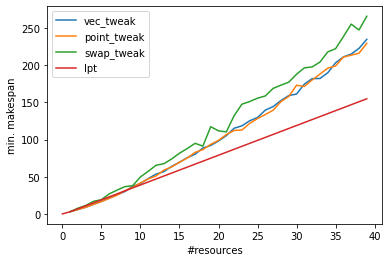

In [6]:
tweak_df.plot.line(xlabel='#resources', ylabel='min. makespan')